<a href="https://colab.research.google.com/github/dougscohen/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
# Calcualte mean by summing all the values in the list and divding by the 
# length of the list

mean = sum(sales)/len(sales)

mean

3052.714285714286

In [0]:
# Caluculate variance

variance = sum((xi - mean)**2 for xi in sales)/(len(sales) - 1)

variance

214387.90476190473

In [0]:
# import numpy and double-check result using np.var()

import numpy as np

np.var(sales, ddof=1)

214387.90476190473

In [0]:
# Calculate standard deviation which is the square root of the variance

std_dev = variance**(1/2)

std_dev

463.0204150595357

In [0]:
# Double-check the result

np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Assign both sets of numbers to a variable

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

# Use np.cov() to return an array of the covariances of each variable to each 
# other (diagonally in the array, the values would equal each variable's 
#variance). Grab the specfic value in the array for covariance between sales 
# and customers using indexing

np.cov(sales, customers, ddof=1)[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Calculate the standard deviaton of 'Customers' list by taking the sqaure root 
# of the variance of 'Customers' (which can be found from the covariance array 
# we previously calculated)

std_dev_customers = (np.cov(sales, customers, ddof=1)[1][1])**(1/2)

std_dev_customers

17.057326313123664

In [0]:
# Finding standard deviation for 'Customers' the long way like we did above 
# for 'Sales'

mean_customers = sum(customers)/len(customers)

variance_customers = sum((xi - mean_customers)**2 for xi in customers)/(len(customers) - 1)

std_dev_cust = variance_customers**(1/2)

std_dev_cust

17.057326313123664

In [0]:
# Check to make sure the 2 ways I calculated are the same

std_dev_customers == std_dev_cust

True

In [0]:
# Triple-check using numpy

np.std(customers, ddof=1)

17.057326313123664

In [0]:
# Reassign the standard deviation of sales to a better variable

std_dev_sales = std_dev

In [0]:
# Find the correlation coefficient between 'Sales' and 'Customers'

r = (np.cov(sales, customers, ddof=1)[0][1])/(std_dev_sales*std_dev_customers)

r

0.9628339778148909

In [0]:
# Double-check work using numpy

np.corrcoef(customers, sales)[0][1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# read in the dataset

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# Find which columns are numeric in nature

df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
# Calculate the variance-covariance matrix of the dataset

df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [56]:
# Calculate the correlation matrix of the dataset

df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

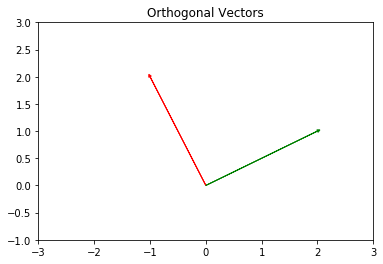

In [71]:
# A synomym for orthogonal is perpendicular 

import matplotlib.pyplot as plt

red = [-1, 2]
green = [2, 1]

plt.arrow(0,0, red[0], red[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, green[0], green[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [73]:
# Make vectors into numpy arrays

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

# calculate dot product

np.dot(a, b)

# vectors are not orthogonal because dot product does not equal 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [79]:
c = np.array([2, -15, 6, 20])

print(f"Determinent: {np.linalg.norm(c)}")
print(f"Dot Product: {np.dot(c, c)}")
print(c.T*c)

Determinent: 25.787593916455254
Dot Product: 665
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [84]:
# To turn a vector into a unit vector, we have to divide the vector by its norm 
# (length). First I made the vector into a numpy array.

f = np.array([4, 12, 11, 9, 2])

# Calculat the norm and assign it to a variable

norm_f = np.linalg.norm(f)

norm_f

19.131126469708992

In [87]:
# Divide the vector by its norm to get the unit vector

unit_vector_f = f/norm_f

unit_vector_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

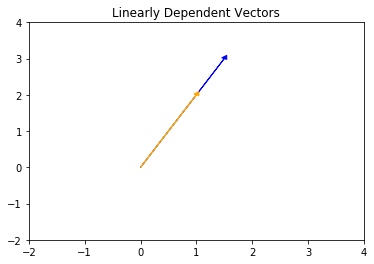

In [101]:
v1 = [1.5, 3]
v2 = [1, 2]

plt.arrow(0, 0, v1[0], v1[1], head_width=.1, head_length=.1, color='blue')
plt.arrow(0, 0, v2[0], v2[1], head_width=.1, head_length=.1, color='orange')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.title('Linearly Dependent Vectors')
plt.show()

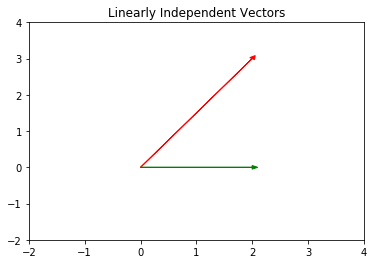

In [102]:
v3 = [2, 3]
v4 = [2, 0]

plt.arrow(0, 0, v3[0], v3[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0, 0, v4[0], v4[1], head_width=.1, head_length=.1, color='green')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span of these two vectors is 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# The span of these vectors is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



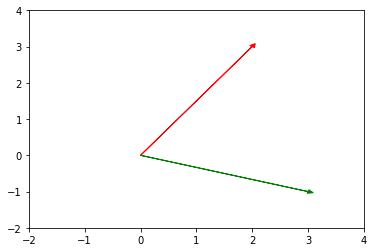

In [90]:
# graph two vectors that are linearly independent of each other

vector_1 = [2, 3]
vector_2 = [3, -1]

plt.arrow(0, 0, vector_1[0], vector_1[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width=.1, head_length=.1, color='green')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors that are linear independent and that span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [94]:
# Make P into a matrix using np.array()

P = np.array([[ 1, 2, 3],
              [-1, 0, 7],
              [ 4, 8, 2]])

# Use linalg.matrix_rank() function to determine rank of the matrix

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns. It tells us the maximum number of linear independant column vectors in a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

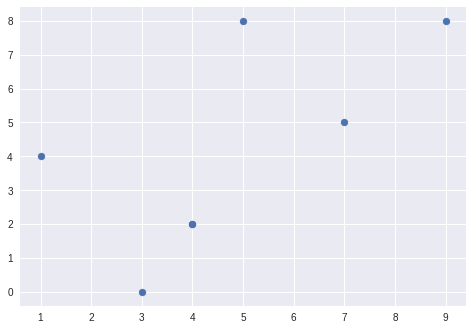

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()